# Sentiment Analysis By Amira Yousif mohamed

In [52]:
#pip install wordcloud

In [53]:
#pip install -U spacy

In [54]:
#pip install -U gensim

In [55]:
#pip install catboost

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

### Reading the Dataset

In [3]:
df=pd.read_csv('1429_1.csv')

In [4]:
df.head(1)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,doRecommend,reviews.id,reviews.numHelpful,rating,reviews.sourceURLs,reviewstext,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter


# Exploratory Data analysis

In [5]:
df['rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64

In [6]:
df2=df.copy()

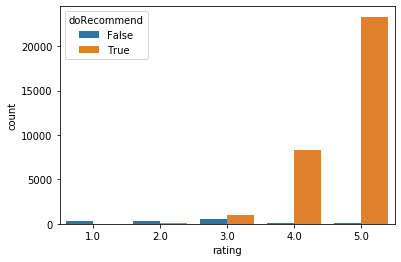

In [7]:
import seaborn as sb
sb.countplot(data = df, x = 'rating', hue = 'doRecommend')

### the previous graph visualize the relation between rating and recommend fields we can see that rate 3 is mixed reviews as 50% of  pepole recommend and 50% not recommend the product so rating 3 will be the middle point between positive and negative reviews

In [8]:
df2.rating=df2.rating.replace(5,'Positive')

#### Rating will be converted to positive, negative and mixed 
* 1,2 negative
* 3 is mixed
* 4,5 is positive reviews 

In [9]:
df2.rating=df2.rating.replace(4,'Positive')
df2.rating.replace(3,'Mixed',inplace=True)
df2.rating.replace(1,'Negative',inplace=True)
df2.rating.replace(2,'Negative',inplace=True)

In [10]:
df2.rating.value_counts()

Positive    32316
Mixed        1499
Negative      812
Name: rating, dtype: int64

### now visualize the relation after minimizing the classes of rating

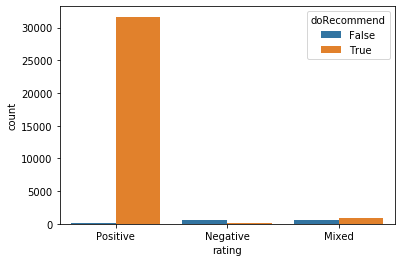

In [11]:
sb.countplot(data = df2, x = 'rating', hue = 'doRecommend')

In [12]:
df2.rating.isnull().sum()

33

In [13]:
df2.rating.dropna(axis=0,inplace=True)
#df.drop(df[df['AGE']>80].index,axis=0,inplace=True)

In [14]:

df2.reviewstext.isnull().sum()


1

In [48]:
### drop null values

In [15]:
df2.reviewstext.dropna(axis=0,inplace=True)

In [16]:
df2.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,doRecommend,reviews.id,reviews.numHelpful,rating,reviews.sourceURLs,reviewstext,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,Positive,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,Positive,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,Positive,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,Positive,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,Positive,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


# 1-Feature Engineering and Selection

in the following steps i will remove un important features clean our target and the review text using the techniques of removing stop words and lemmitiztion

In [17]:
#remove un important features and put the required fields in  a new df  
df_reviews=pd.DataFrame()
df_reviews['review_text']=df2['reviewstext']
df_reviews['rating']=df2['rating']

In [18]:
df_reviews.head()

,review_text,rating
0,This product so far has not disappointed. My c...,Positive
1,great for beginner or experienced person. Boug...,Positive
2,Inexpensive tablet for him to use and learn on...,Positive
3,I've had my Fire HD 8 two weeks now and I love...,Positive
4,I bought this for my grand daughter when she c...,Positive


In [19]:
df_reviews['rating'].unique()

array(['Positive', 'Negative', 'Mixed', nan], dtype=object)

In [20]:
#clean the null values they were 33 row
df_reviews=df_reviews.dropna()

In [21]:
df_reviews['review_text']=df_reviews['review_text'].str.lower() 

In [22]:
df_reviews['rating'].unique()

array(['Positive', 'Negative', 'Mixed'], dtype=object)

# Text Normalization
### Stemming/Lemmatization

In [23]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [24]:
# limitizing text and return a sentence that is lemmitized
from textblob import Word 
def lemmatize_text2(text):
    lemmatizer = WordNetLemmatizer()
    lem=[]
    for i in text.split():
        word1 = Word(i).lemmatize("n")
        word2 = Word(word1).lemmatize("v")
        word3 = Word(word2).lemmatize("a")
        lem.append(Word(word3).lemmatize())
    return lem
df_reviews['review_text_lem'] = df_reviews.review_text.apply(lemmatize_text2)


In [25]:
df_reviews.review_text_lem.head()

0    [this, product, so, far, ha, not, disappointed...
1    [great, for, beginner, or, experience, person....
2    [inexpensive, tablet, for, him, to, use, and, ...
3    [i've, have, my, fire, hd, 8, two, week, now, ...
4    [i, buy, this, for, my, grand, daughter, when,...
Name: review_text_lem, dtype: object

# remove stop words

In [26]:
#remove stop words using nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.remove('not')
#df_reviews['review_text_nostop']= df_reviews['review_text_lem'].str.lower().str.split()  
df_reviews['review_text_nostop']=df_reviews['review_text_lem'].apply(lambda x: [item for item in x if item not in stop])

In [27]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [28]:

df_reviews['review_text_nostop']

0        [product, far, ha, not, disappointed., child, ...
1        [great, beginner, experience, person., buy, gi...
2        [inexpensive, tablet, use, learn, on,, step, n...
3        [i've, fire, hd, 8, two, week, love, it., tabl...
4        [buy, grand, daughter, come, visit., set, user...
                               ...                        
34655    [not, appreciably, fast, 1.8, high, amp, charg...
34656    [amazon, include, charger, kindle., fact, they...
34657    [love, kindle, fire, really, disappoint, kindl...
34658    [wa, surprise, find, not, come, type, charge, ...
34659    [spite, fact, nothing, good, thing, say, amazo...
Name: review_text_nostop, Length: 34626, dtype: object

In [29]:
#df_reviews['tokens']=df_reviews['review_text_nostop']
df_reviews['tokens']=df_reviews.review_text_nostop.apply(lambda x:" ".join(str(x) for x in x))

In [30]:
df_reviews['tokens'].head()

0    product far ha not disappointed. child love us...
1      great beginner experience person. buy gift love
2    inexpensive tablet use learn on, step nabi. wa...
3    i've fire hd 8 two week love it. tablet great ...
4    buy grand daughter come visit. set user, enter...
Name: tokens, dtype: object

In [31]:
#Df_reviews is my cleaned dataset now
df_clean=pd.DataFrame()
df_clean['clean_text']=df_reviews['tokens']
df_clean['rating_class']=df_reviews['rating']

# 2-Data Preprocessing
Separating Response Variable and Feature

In [32]:
display(df_clean.info(),df_clean.head(),df_clean.rating_class.value_counts())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   clean_text    34626 non-null  object
 1   rating_class  34626 non-null  object
dtypes: object(2)
memory usage: 811.5+ KB


None

,clean_text,rating_class
0,product far ha not disappointed. child love us...,Positive
1,great beginner experience person. buy gift love,Positive
2,"inexpensive tablet use learn on, step nabi. wa...",Positive
3,i've fire hd 8 two week love it. tablet great ...,Positive
4,"buy grand daughter come visit. set user, enter...",Positive


Positive    32315
Mixed        1499
Negative      812
Name: rating_class, dtype: int64

#### Now i will convert my 3 new classes to 1,0,-1
* (Positive,1)
* ('Negative',-1)
* ('Mixed',0)

In [33]:
df_clean.rating_class=df_clean.rating_class.replace('Positive',1)
df_clean.rating_class=df_clean.rating_class.replace('Negative',-1)
df_clean.rating_class=df_clean.rating_class.replace('Mixed',0)



In [34]:
df_clean.rating_class.unique()

array([ 1, -1,  0], dtype=int64)

### Splitting Dataset into Train and Test Set

In [34]:
X = df_clean['clean_text']
y = df_clean['rating_class']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Evaluation Matrix

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score
def predict_batches(avg,model, features, labels, split=200):
    
    predictions =  model.predict(features)
    
    # Calculate accuracy
    accuracy = accuracy_score(labels, predictions)
    print(f'Accuracy: {accuracy}')
    
    # Calculate precision
    precision = precision_score(labels, predictions,average=avg)
    print(f'Precision: {precision}')
    
    # Calculate recall
    recall = recall_score(labels, predictions,average=avg)
    print(f'Recall: {recall}')
   
    confusion_matrix = pd.crosstab(index=labels, columns=np.round(predictions), rownames=['True'], colnames=['predictions']).astype(int)
    plt.figure(figsize = (5,5))
 
    sb.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix') 
    

# 4- Modeling

### 4.1 CountVectorizer Bag of Words

In [38]:
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [39]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 10798


In [40]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [41]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,00,000,000s,01,04,05,06,0ne,10,100,...,zeus,zinio,zip,zipper,zippy,zombies,zone,zoo,zoom,zwave
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating a function for applying different algorithms

In [59]:
def modeling(avg,Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    predict_batches(avg,model, Xtest, y_test)
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

## Exploring ways to handel imbalanced data 

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE("minority")
x_train_res, y_train_res = sm.fit_sample(count_vect_train, y_train)
smote_df = pd.DataFrame(x_train_res,columns=vocab)
smote_df['rating_class'] = y_train_res # Enter your code here
smote_df.head()
smote_df.shape

(49565, 10799)

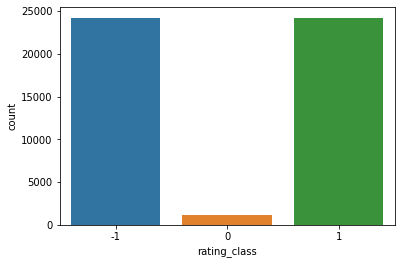

In [53]:
sb.countplot(data=smote_df,x='rating_class')

In [55]:
sm = SMOTE("minority")
x_train_res, y_train_res = sm.fit_sample(x_train_res, y_train_res)
smote_df = pd.DataFrame(x_train_res,columns=vocab)
smote_df['rating_class'] = y_train_res # Enter your code here
smote_df.head()
smote_df.shape

(72633, 10799)

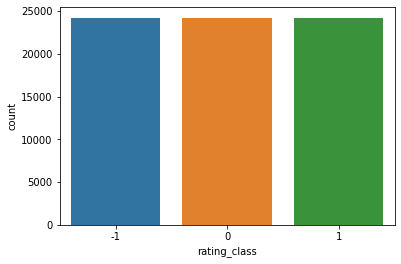

In [77]:
sb.countplot(data=smote_df,x='rating_class')

# Dummy Classifier  with CountVectorizer

In [49]:

clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.8781513704664744


Accuracy: 0.8777867621577914
Precision: 0.8785173266899482
Recall: 0.8777867621577914


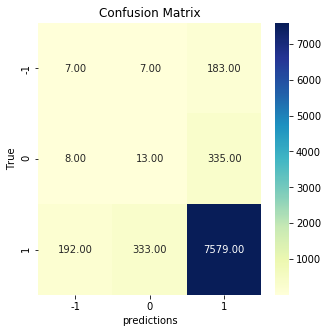

In [50]:
predict_batches('weighted',clf, X_test, y_test)

##  Logistic Regression with CountVectorizer

Accuracy: 0.8152939817488738
Precision: 0.9284038055575684
Recall: 0.8152939817488738
f1 score: 0.8606844370628756


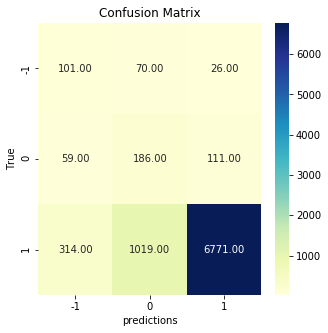

In [45]:


# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling('weighted',LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))



## Random Froest with CountVectorizer

Accuracy: 0.9358900311886335
Precision: 0.9255838063898763
Recall: 0.9358900311886335
f1 score: 0.9064282805378658


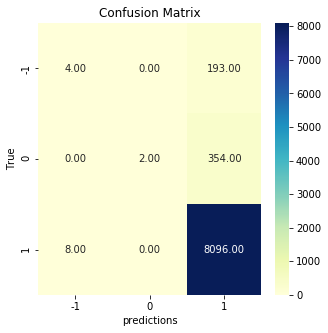

In [60]:
modeling('weighted',RandomForestClassifier(class_weight="balanced",n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process


### Comparing the 3 models implemented with count vectorizer

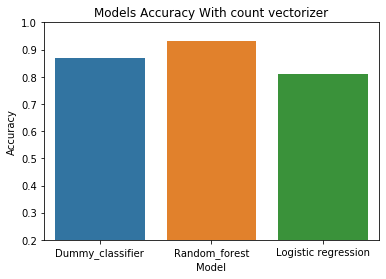

In [46]:
df_model=pd.DataFrame()
df_model['Model']=['Dummy_classifier','Random_forest','Logistic regression']
df_model['Accuracy']=[.87,.93,.81]
sb.barplot(data=df_model,x='Model',y='Accuracy')
plt.ylim(.2,1);

plt.title('Models Accuracy With count vectorizer');

### summary of evaluation 
* Dummy Classifier:
Accuracy: 0.87  - Precision: 0.87 - Recall: 0.87
* Random Forest :
Accuracy: 0.93 - Precision: 0.92 - Recall: 0.93 - f1 score: 0.90
* Logistic Regression
Accuracy: 0.81 - Precision: 0.92 -Recall: 0.81 - f1 score: 0.86


 # using TF_IDF

In [37]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

In [38]:
def modeling_new(avg,Model, Xtrain, Xtest):
   
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    predict_batches(avg,model, Xtest, y_test)
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

## Logistic regression with tf-idf

Accuracy: 0.7945015594316738
Precision: 0.9309251594119466
Recall: 0.7945015594316738
f1 score: 0.8474588667185226


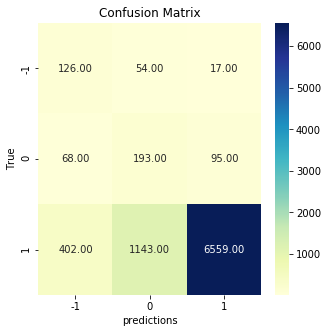

In [40]:
modeling_new('weighted',LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

## Random forest with tf_idf

Accuracy: 0.9354279773593623
Precision: 0.8944432398139753
Recall: 0.9354279773593623
f1 score: 0.9062716284818715


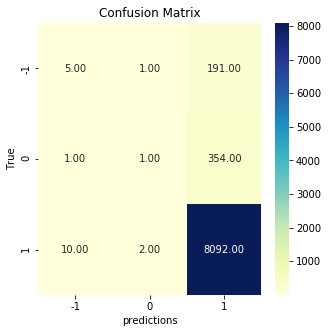

In [41]:
modeling_new('weighted',RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

## Naive Bayes

Accuracy: 0.9361210581032691
Precision: 0.876322635424384
Recall: 0.9361210581032691
f1 score: 0.9052353743653592


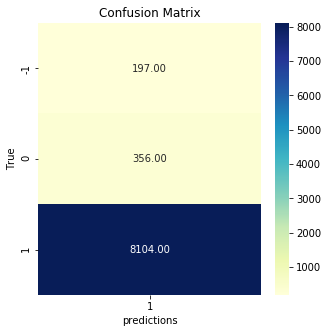

In [42]:
modeling_new('weighted',MultinomialNB(),tfidf_vect_train, tfidf_vect_test)


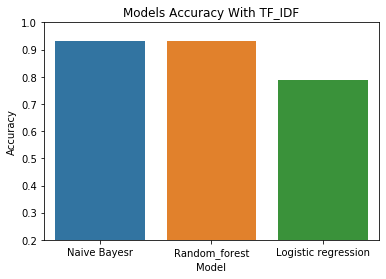

In [45]:
df_model=pd.DataFrame()
df_model['Model']=['Naive Bayesr','Random_forest','Logistic regression']
df_model['Accuracy']=[0.93,0.93,0.79]
sb.barplot(data=df_model,x='Model',y='Accuracy')
plt.ylim(.2,1);
plt.title('Models Accuracy With TF_IDF');

### summary of evaluation 
* Naive Bayes:
Accuracy: 0.93 - Precision: 0.87 - Recall: 0.93 -f1 score: 0.90
* Random Forest :
Accuracy: 0.93 - Precision: 0.92 - Recall: 0.93 - f1 score: 0.90
* Logistic Regression
Accuracy: 0.79 - Precision: 0.93 - Recall: 0.79 -f1 score: 0.84

### in both ways(count vectorizer and tf_idf) logistic regrssion got the lowest accuracy,f1_score,percision and recall and random forest got the highest scores